In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import os

In [2]:
import numpy as np
import cvxpy as cp
A = np.array([[2.08 , 4.55] ,
[3.60 , 6.19] ,
[0.00 , 2.02] ,
[1.51 , 4.09] ,
[0.73 , 2.53] ,
[0.46 , 2.98] ,
[0.93 , 3.48] ,
[1.73 , 4.34] ,
[1.98 , 6.23] ,
[2.69 , 5.13] ,
[2.10 , 4.58] ,
[3.43 , 5.96] ,
[1.02 , 3.18] ,
[4.39 , 7.67] ,
[0.14 , 1.93] ,
[3.35 , 6.05] ,
[2.09 , 4.37] ,
[2.79 , 5.20] ,
[0.70 , 2.64] ,
[0.99 , 3.23] ,
[4.00 , 6.61] ,
[4.84 , 8.13] ,
[1.57 , 4.54] ,
[3.46 , 6.59] ,
[4.38 , 7.41] ,
[4.47 , 7.28] ,
[0.43 , 2.27] ,
[0.20 , 2.84] ,
[0.85 , 3.08] ,
[4.39 , 7.27]])

In [10]:
m = A.shape[0] # The number of data points

x = A[:,0] # First column of A
y = A[:,1] # Second column of A

t = cp.Variable(m)
z = cp.Variable(1)
w = cp.Variable(1)

objective = cp.Minimize(cp.sum(t))

constraints = []
constraints += [(t[i] >= y[i] - z*x[i] - w) for i in range(m)]
constraints += [(t[i] >= -y[i] + z*x[i] + w) for i in range(m)]

prob = cp.Problem(objective, constraints)

prob.solve(solver=cp.GUROBI)

print(f"z* = {z.value[0]:.2f}")
print(f"w* = {w.value[0]:.2f}")
print(prob.value)

z* = 1.19
w* = 2.05
7.930000000000002


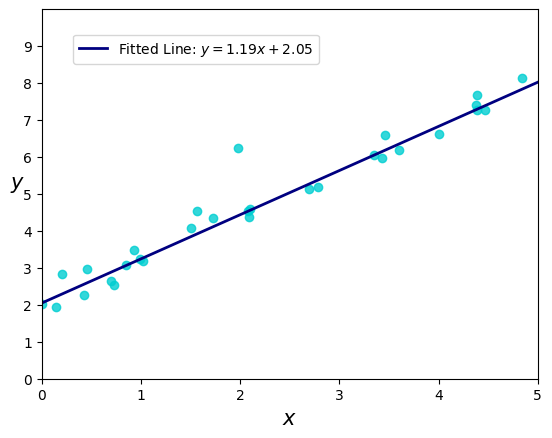

In [4]:
#plot data and line

plt.scatter(A[:, 0], A[:, 1], color='darkturquoise', alpha=0.8)
plt.plot([0, 5], [z.value[0]*0+w.value[0], z.value[0]*5+w.value[0]], color='navy', linewidth=2, label='Fitted Line: $y = %.2fx + %.2f$' % (z.value[0], w.value[0]))
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.xlim(0, 5)  # Force x-axis to start from 0
plt.ylim(0, 10)
plt.xticks(np.arange(0, 6, 1), fontsize=10)
plt.yticks(np.arange(0, 10, 1), fontsize=10)
plt.legend(fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fancybox=True, fontsize=10)

#save plot to plots directory
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/hw2_q1_plot.pgf', bbox_inches='tight')
plt.show()

In [15]:
m = A.shape[0] # The number of data points

x = A[:,0] # First column of A
y = A[:,1] # Second column of A

l = cp.Variable(1)
t = cp.Variable(m)
z = cp.Variable(1)
w = cp.Variable(1)

objective = cp.Minimize(l)

constraints = []
constraints += [(t[i] >= y[i] - z*x[i] - w) for i in range(m)]
constraints += [(t[i] >= -y[i] + z*x[i] + w) for i in range(m)]
constraints += [l >= t[i] for i in range(m)]

prob = cp.Problem(objective, constraints)

prob.solve(solver=cp.GUROBI)

print(f"z* = {z.value[0]:.2f}")
print(f"w* = {w.value[0]:.2f}")
print(prob.value)


z* = 1.25
w* = 2.69
1.0701834862385324


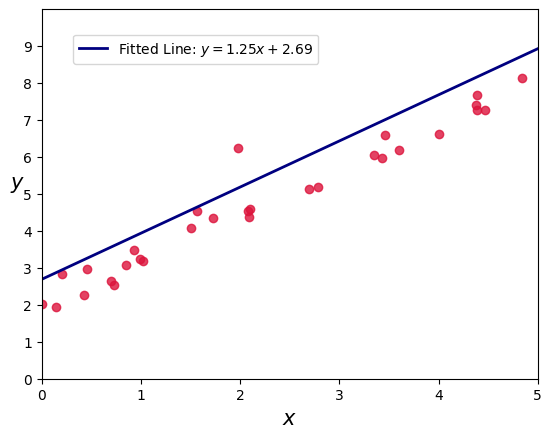

In [6]:
#plot data and line

plt.scatter(A[:, 0], A[:, 1], color='crimson', alpha=0.8)
plt.plot([0, 5], [z.value[0]*0+w.value[0], z.value[0]*5+w.value[0]], color='navy', linewidth=2, label='Fitted Line: $y = %.2fx + %.2f$' % (z.value[0], w.value[0]))
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.xlim(0, 5)  # Force x-axis to start from 0
plt.ylim(0, 10)
plt.xticks(np.arange(0, 6, 1), fontsize=10)
plt.yticks(np.arange(0, 10, 1), fontsize=10)
plt.legend(fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fancybox=True, fontsize=10)

#save plot to plots directory
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/hw2_q1_plot.pgf', bbox_inches='tight')
plt.show()

Optimal solution is: z = 1.194915254237288 and the optimal w is: 2.047033898305085
Optimal value is: 7.9300000000000015
Optimal status:  optimal
